In [1]:
import h5py

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib import colors
from utils import preprocess

# From npy

In [2]:
def plot_from_npy(npy_file, save_path=None):
    data = np.load(npy_file)
    fig, ax = plt.subplots(1,1, figsize=(5, 4))

    cmap = mpl.cm.get_cmap("jet").copy()
    cmap.set_under(color='white')

    imag = ax.imshow(data.sum(axis=0)[:,:,0].transpose() / data.shape[0], extent=[-1.0, 1.0, -1.0, 1.0], norm=colors.SymLogNorm(linthresh=0.0001, linscale=0.1, vmin=1e-3, vmax=1e3), cmap=cmap, origin='lower')
    cbar = plt.colorbar(imag, ax=ax, shrink=0.9)

    ax.set_xlabel(r'$\eta^\prime$') 
    ax.set_ylabel(r'$\phi^\prime$')

    cbar.set_label(r'$ p_{\mathrm{T}}$ [GeV]', rotation=90, labelpad=5)

    if save_path:
        plt.savefig(save_path, dpi=300, facecolor='White', bbox_inches='tight')

    plt.show()

    return data.sum(axis=0)[:,:,0].transpose() / data.shape[0]

def plot_jet_image(data, save_path=None):
    fig, ax = plt.subplots(1,1, figsize=(5, 4))

    cmap = mpl.cm.get_cmap("jet").copy()
    cmap.set_under(color='white')

    imag = ax.imshow(data, extent=[-1.0, 1.0, -1.0, 1.0], norm=colors.SymLogNorm(linthresh=0.0001, linscale=0.1, vmin=1e-3, vmax=1e3), cmap=cmap, origin='lower')
    cbar = plt.colorbar(imag, ax=ax, shrink=0.9)

    ax.set_xlabel(r'$\eta^\prime$') 
    ax.set_ylabel(r'$\phi^\prime$')

    cbar.set_label(r'$ p_{\mathrm{T}}$ [GeV]', rotation=90, labelpad=5)

    if save_path:
        plt.savefig(save_path, dpi=300, facecolor='White', bbox_inches='tight')

    plt.show()

    return data

In [3]:
def plot_jet_image_on_axis(data, ax):
    cmap = mpl.cm.get_cmap("jet").copy()
    cmap.set_under(color='white')

    imag = ax.imshow(data, extent=[-1.0, 1.0, -1.0, 1.0], norm=colors.SymLogNorm(linthresh=0.0001, linscale=0.1, vmin=1e-3, vmax=1e3), cmap=cmap, origin='lower')
    cbar = plt.colorbar(imag, ax=ax, shrink=0.9)

    ax.set_xlabel(r'$\eta^\prime$') 
    ax.set_ylabel(r'$\phi^\prime$')

## Testing samples

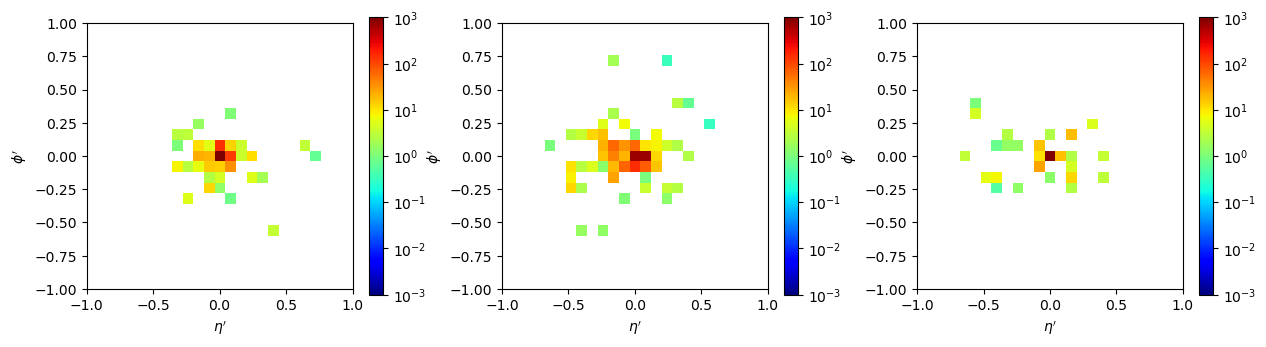

In [6]:
# Get original and augmented jet image from npy file
data = np.load('./HVmodel/data/split_val/25x25/mix_sample_test-2-data.npy')

original_size = data.shape[0]
events = np.array([0, 22, 96])
n = len(events)


fig, ax = plt.subplots(1, n, figsize=(5*n, 4))
for i in range(n):
    event = events[i]
    plot_jet_image_on_axis(data[event,:,:,0].transpose(), ax[i])
    
# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
# plt.savefig('../figures/HVmodel_jet_image_eta_phi_smearing_01.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## Nomalize $p_{\text{T}}$

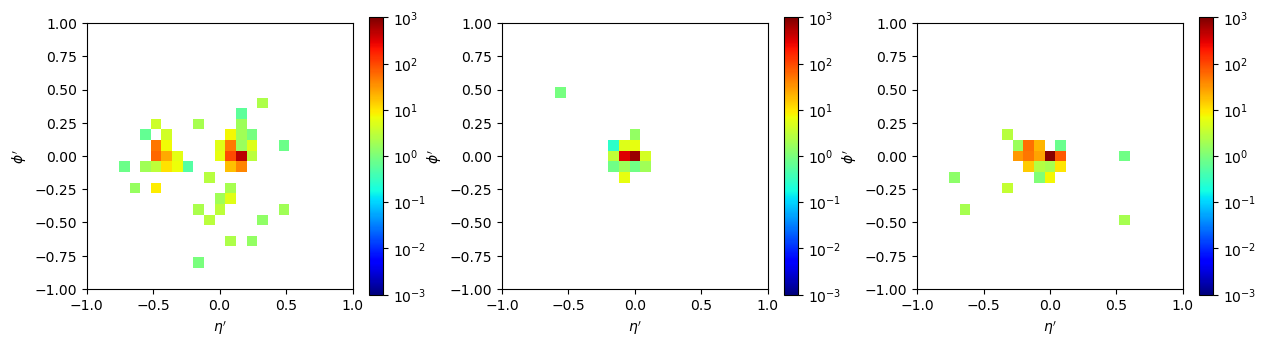

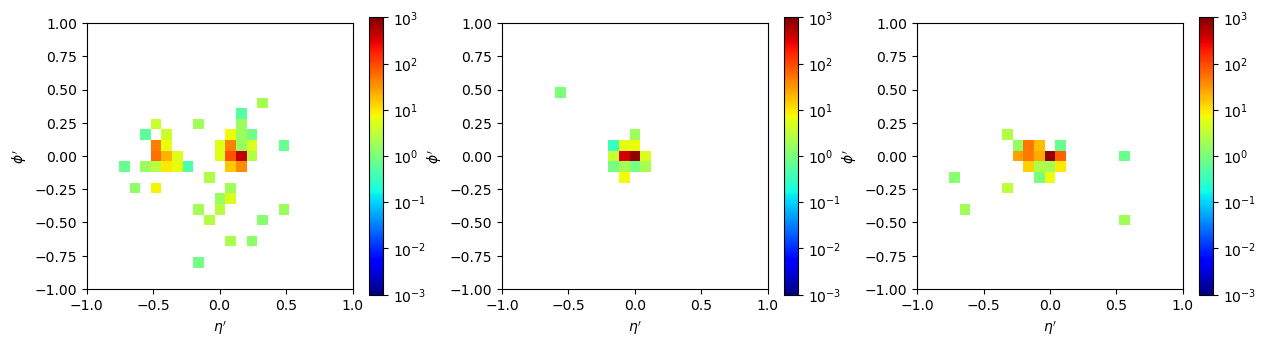

In [4]:
# Get original and augmented jet image from npy file
data = np.load('./HVmodel/data/mjj_normalization/25x25/bkg_in_SB-data.npy')

original_size = data.shape[0]
events = np.array([0, 22, 96])
n = len(events)


fig, ax = plt.subplots(1, n, figsize=(5*n, 4))
for i in range(n):
    event = events[i]
    plot_jet_image_on_axis(data[event,:,:,0].transpose(), ax[i])
    
# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
# plt.savefig('../figures/HVmodel_jet_image_eta_phi_smearing_01.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()


data = np.load('./HVmodel/data/origin/25x25/bkg_in_SB-data.npy')

fig, ax = plt.subplots(1, n, figsize=(5*n, 4))

for i in range(n):
    event = events[i]
    plot_jet_image_on_axis(data[event,:,:,0].transpose(), ax[i])

# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
# plt.savefig('../figures/HVmodel_jet_image_eta_phi_smearing_02.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

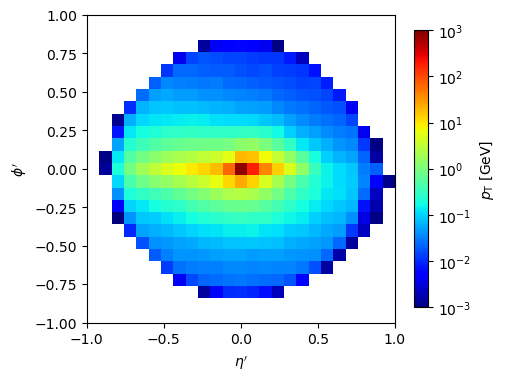

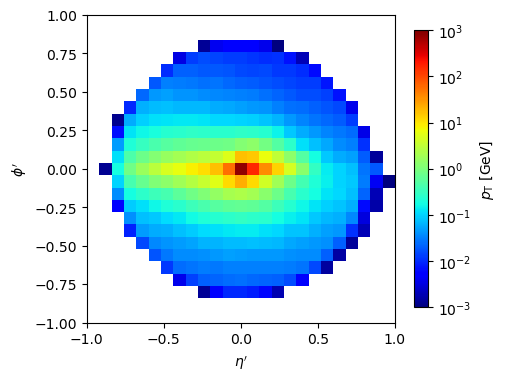

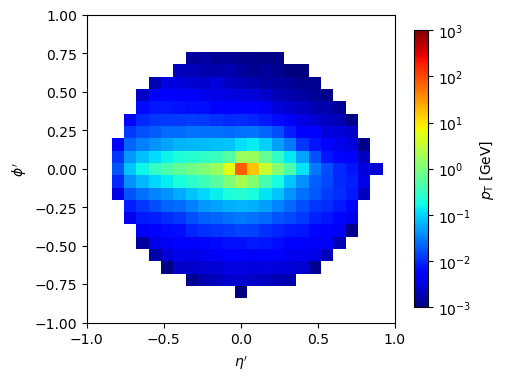

In [5]:
data_normalize = plot_from_npy('./HVmodel/data/mjj_normalization/25x25/bkg_in_SB-data.npy', '../figures/HVmodel_jet_image_average_bkg_in_SB_mjj_normalized.pdf')
data_origin = plot_from_npy('./HVmodel/data/origin/25x25/bkg_in_SB-data.npy', '../figures/HVmodel_jet_image_average_bkg_in_SB_origin.pdf')

_ = plot_jet_image(data_normalize - data_origin, '../figures/HVmodel_jet_image_average_bkg_in_SB_mjj_normalized_origin_difference.pdf')

## $\eta - \phi$ smearing

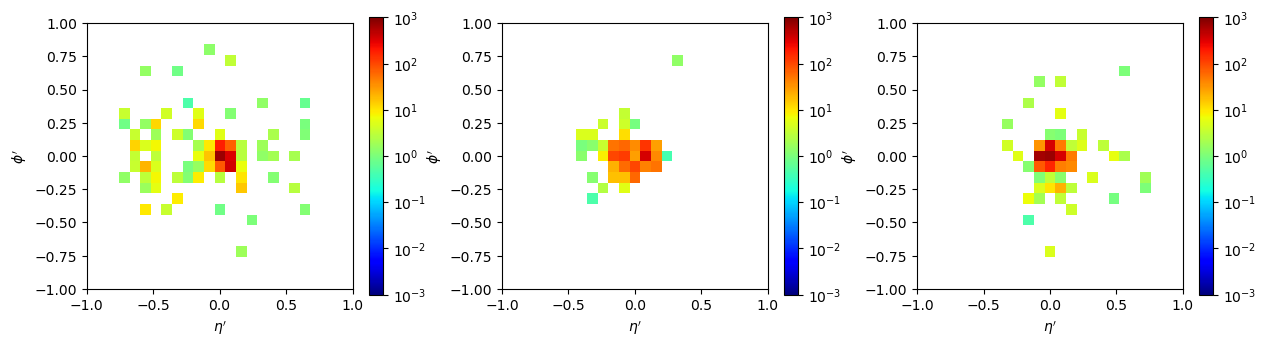

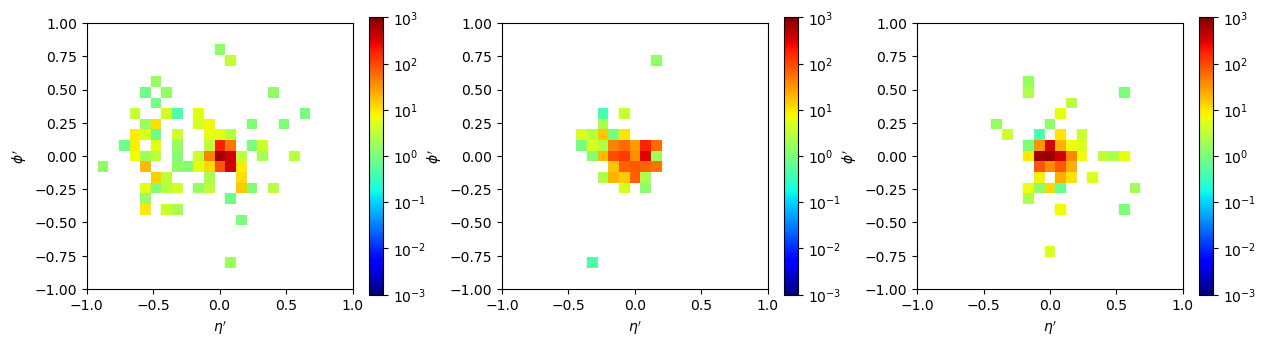

In [ ]:
# Get original and augmented jet image from npy file
data = np.load('./HVmodel/data/eta_phi_smearing/25x25/01/sig_in_SR-data.npy')

original_size = data.shape[0]
events = np.array([0, 22, 96])
n = len(events)


fig, ax = plt.subplots(1, n, figsize=(5*n, 4))
for i in range(n):
    event = events[i]
    plot_jet_image_on_axis(data[event,:,:,0].transpose(), ax[i])
    
# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
# plt.savefig('../figures/HVmodel_jet_image_eta_phi_smearing_01.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()


data = np.load('./HVmodel/data/eta_phi_smearing/25x25/02/sig_in_SR-data.npy')

fig, ax = plt.subplots(1, n, figsize=(5*n, 4))

for i in range(n):
    event = events[i]
    plot_jet_image_on_axis(data[event,:,:,0].transpose(), ax[i])

# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
# plt.savefig('../figures/HVmodel_jet_image_eta_phi_smearing_02.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## $p_\text{T}$ smearing

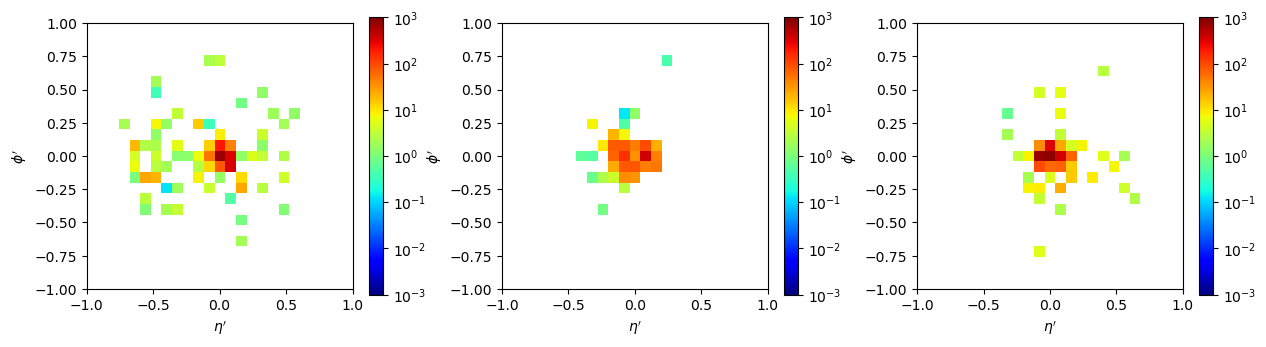

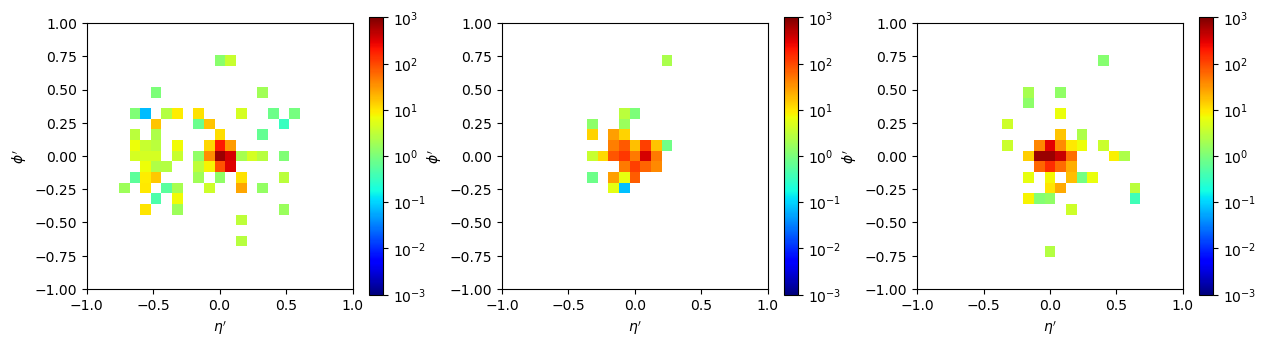

In [ ]:
# Get original and augmented jet image from npy file
data = np.load('./HVmodel/data/pt_smearing/25x25/01/sig_in_SR-data.npy')

original_size = data.shape[0]
events = np.array([0, 22, 96])
n = len(events)


fig, ax = plt.subplots(1, n, figsize=(5*n, 4))
for i in range(n):
    event = events[i]
    plot_jet_image_on_axis(data[event,:,:,0].transpose(), ax[i])
    
# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
# plt.savefig('../figures/HVmodel_jet_image_pt_smearing_01.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()


data = np.load('./HVmodel/data/pt_smearing/25x25/02/sig_in_SR-data.npy')

fig, ax = plt.subplots(1, n, figsize=(5*n, 4))

for i in range(n):
    event = events[i]
    plot_jet_image_on_axis(data[event,:,:,0].transpose(), ax[i])

# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
# plt.savefig('../figures/HVmodel_jet_image_pt_smearing_02.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## Jet rotation

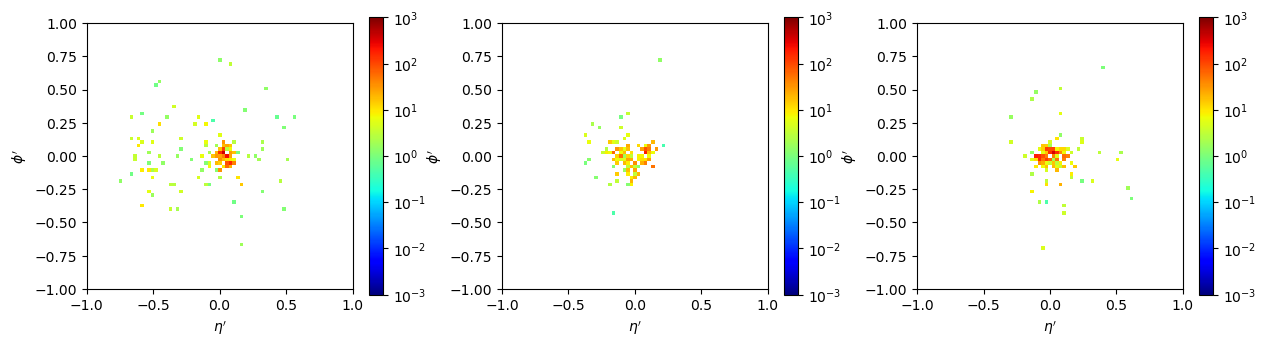

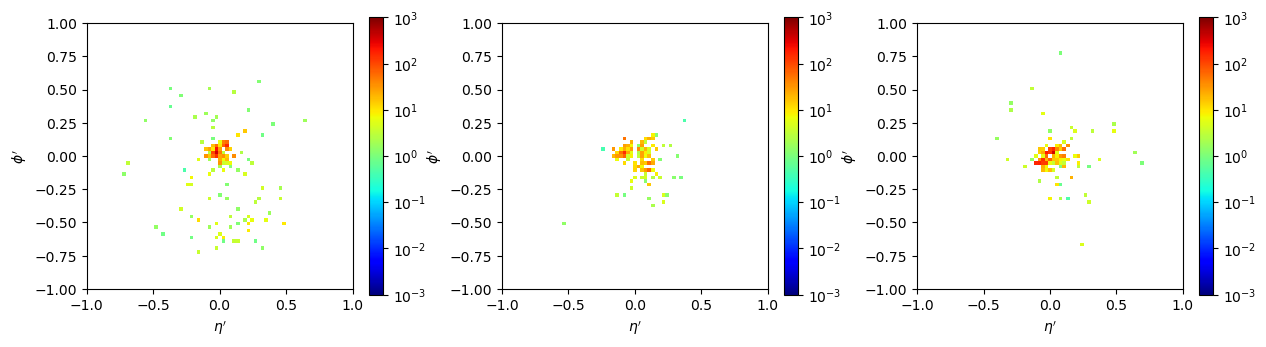

In [3]:
# Get original and augmented jet image from npy file
data = np.load('./HVmodel/data/rotate_jet/mix_sample_10.0_jet_aug_1_demo_75x75-data.npy')

original_size = data.shape[0] // 2
events = np.array([0, 22, 96])
n = len(events)

events = np.concatenate((events, events + original_size))

fig, ax = plt.subplots(1, n, figsize=(5*n, 4))
for i in range(n):
    event = events[i]
    plot_jet_image_on_axis(data[event,:,:,0].transpose(), ax[i])
    
# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
plt.savefig('../figures/HVmodel_jet_image_jet_rotation_original.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1, n, figsize=(5*n, 4))

for i in range(n):
    event = events[n+i]
    plot_jet_image_on_axis(data[event,:,:,0].transpose(), ax[i])

# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
plt.savefig('../figures/HVmodel_jet_image_jet_rotation_augmented.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

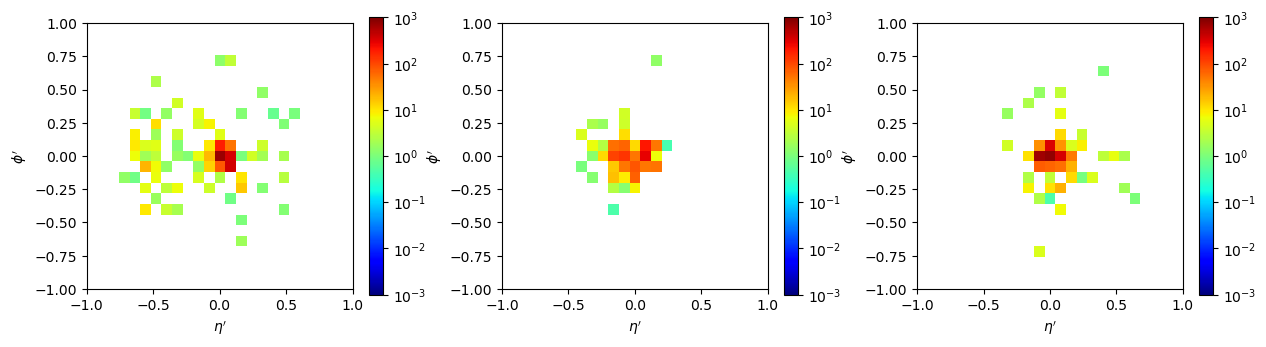

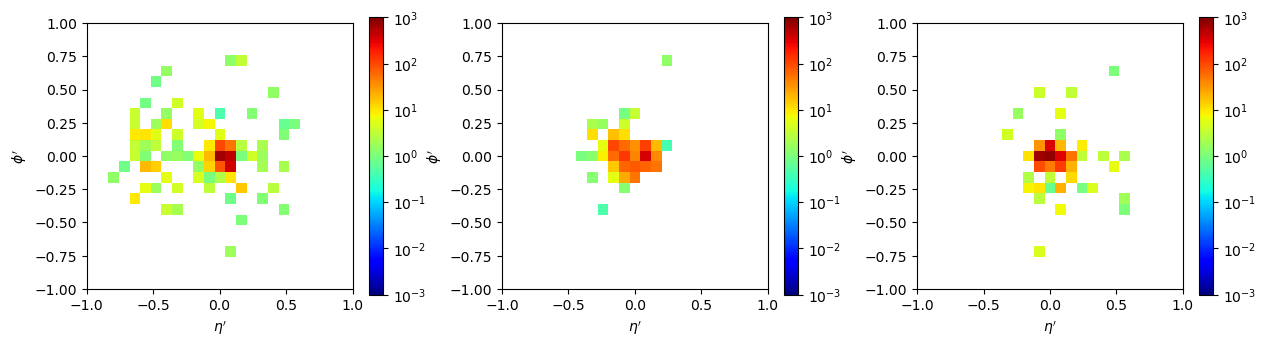

In [11]:
# Get original and augmented jet image from npy file
data = np.load('./HVmodel/data/jet_rotation/mix_sample_10.0_jet_aug_pm5_demo_25x25-data.npy')

original_size = data.shape[0] // 3
events = np.array([0, 22, 96])
n = len(events)

events = np.concatenate((events, events + original_size))

fig, ax = plt.subplots(1, n, figsize=(5*n, 4))
for i in range(n):
    event = events[i]
    plot_jet_image_on_axis(data[event,:,:,0].transpose(), ax[i])
    
# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
# plt.savefig('../figures/HVmodel_jet_image_jet_rotation_original.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1, n, figsize=(5*n, 4))

for i in range(n):
    event = events[n+i]
    plot_jet_image_on_axis(data[event,:,:,0].transpose(), ax[i])

# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
# plt.savefig('../figures/HVmodel_jet_image_jet_rotation_augmented.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

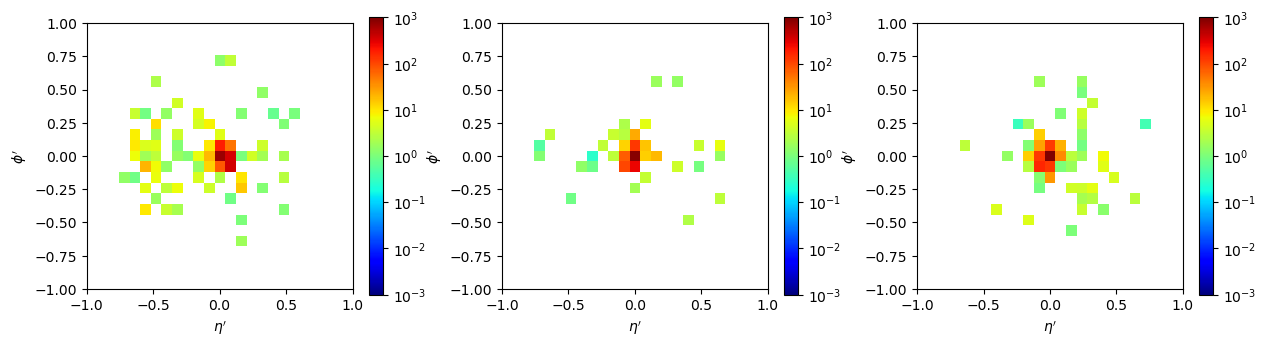

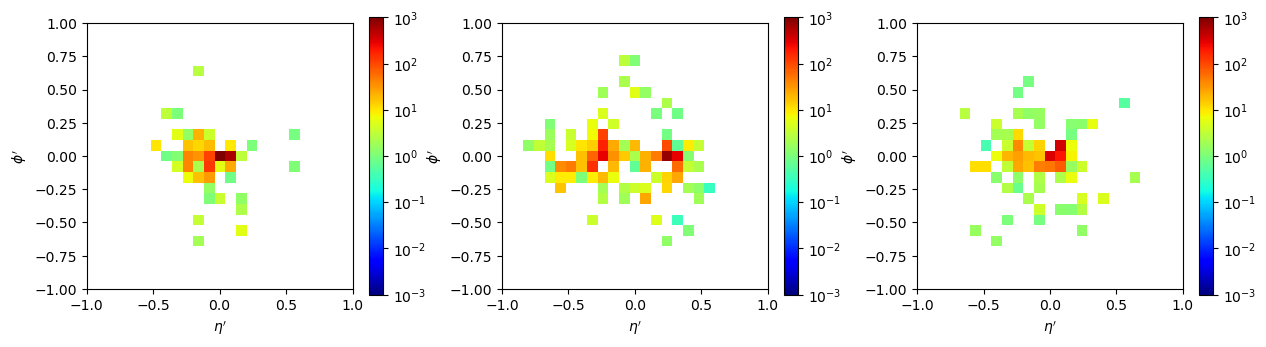

In [5]:
# Get original and augmented jet image from npy file
data = np.load('./HVmodel/data/origin/25x25/signal-data.npy')

original_size = data.shape[0] // 2
events = np.array([0, 22, 96])
n = len(events)

events = np.concatenate((events, events + original_size))

fig, ax = plt.subplots(1, n, figsize=(5*n, 4))
for i in range(n):
    event = events[i]
    plot_jet_image_on_axis(data[event,:,:,0].transpose(), ax[i])
    
# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
# plt.savefig('../figures/HVmodel_jet_image_jet_rotation_original.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1, n, figsize=(5*n, 4))

for i in range(n):
    event = events[n+i]
    plot_jet_image_on_axis(data[event,:,:,0].transpose(), ax[i])

# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
# plt.savefig('../figures/HVmodel_jet_image_jet_rotation_augmented.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

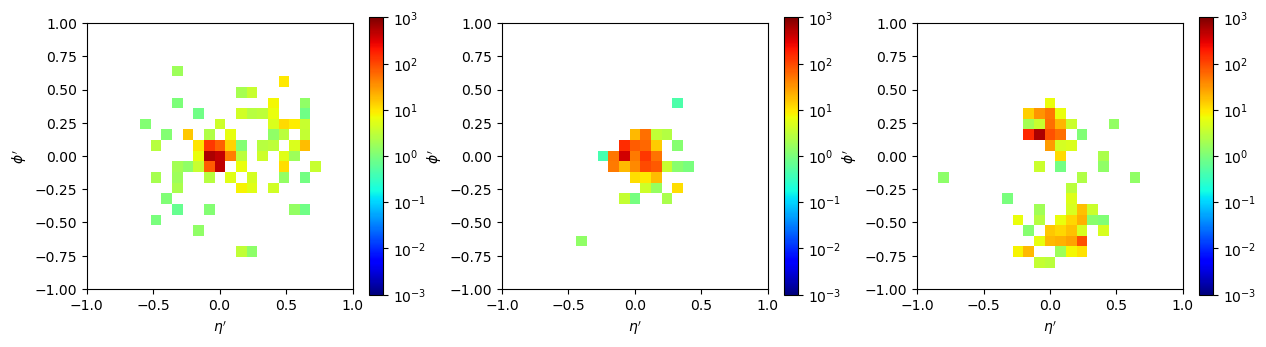

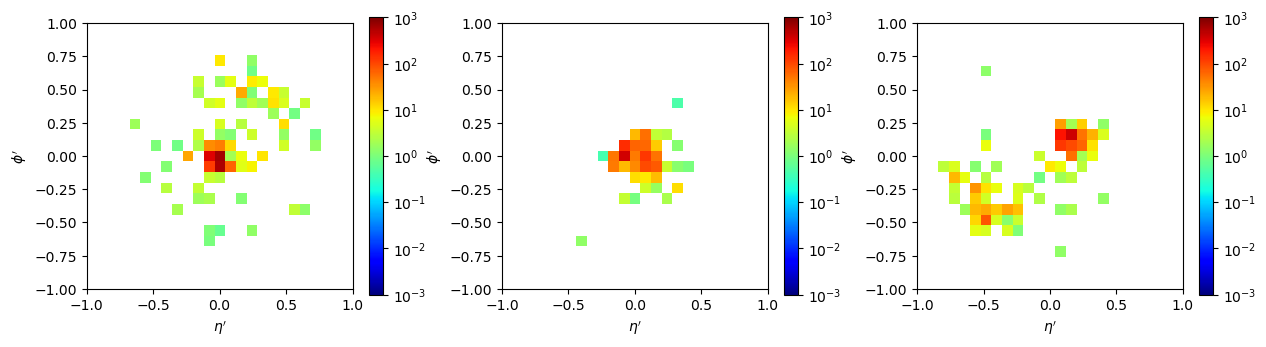

In [6]:
# Get original and augmented jet image from npy file
data = np.load('./HVmodel/data/jet_rotation/25x25/01/sig_in_SR-data.npy')

original_size = data.shape[0]
events = np.array([0, 22, 1025])
n = len(events)


fig, ax = plt.subplots(1, n, figsize=(5*n, 4))
for i in range(n):
    event = events[i]
    plot_jet_image_on_axis(data[event,:,:,0].transpose(), ax[i])
    
# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
# plt.savefig('../figures/HVmodel_jet_image_jet_rotation_original.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()


data = np.load('./HVmodel/data/jet_rotation/25x25/02/sig_in_SR-data.npy')

fig, ax = plt.subplots(1, n, figsize=(5*n, 4))

for i in range(n):
    event = events[i]
    plot_jet_image_on_axis(data[event,:,:,0].transpose(), ax[i])

# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
# plt.savefig('../figures/HVmodel_jet_image_jet_rotation_augmented.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## $p_\text{T}$ smearing + Jet rotation

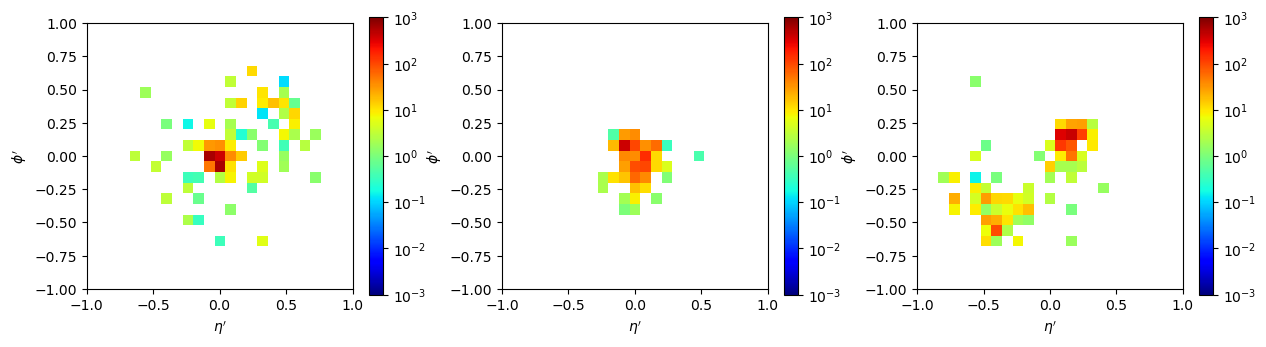

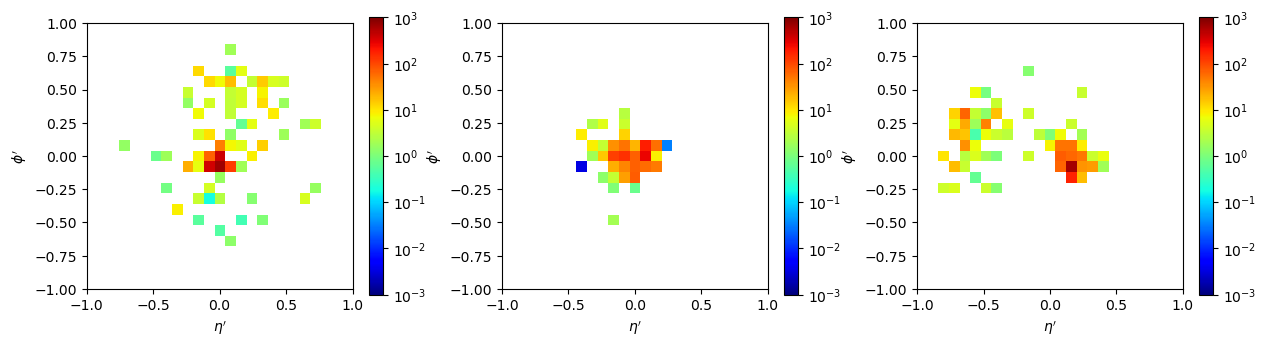

In [4]:
# Get original and augmented jet image from npy file
data = np.load('./HVmodel/data/pt_smearing_jet_rotation/25x25/01/sig_in_SR-data.npy')

original_size = data.shape[0]
events = np.array([0, 22, 1025])
n = len(events)


fig, ax = plt.subplots(1, n, figsize=(5*n, 4))
for i in range(n):
    event = events[i]
    plot_jet_image_on_axis(data[event,:,:,0].transpose(), ax[i])
    
# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
# plt.savefig('../figures/HVmodel_jet_image_pt_jet_aug_original.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()


data = np.load('./HVmodel/data/pt_smearing_jet_rotation/25x25/02/sig_in_SR-data.npy')

fig, ax = plt.subplots(1, n, figsize=(5*n, 4))

for i in range(n):
    event = events[i]
    plot_jet_image_on_axis(data[event,:,:,0].transpose(), ax[i])

# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
# plt.savefig('../figures/HVmodel_jet_image_pt_jet_aug_augmented.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## $\eta - \phi$ smearing + $p_\text{T}$ smearing + Jet rotation

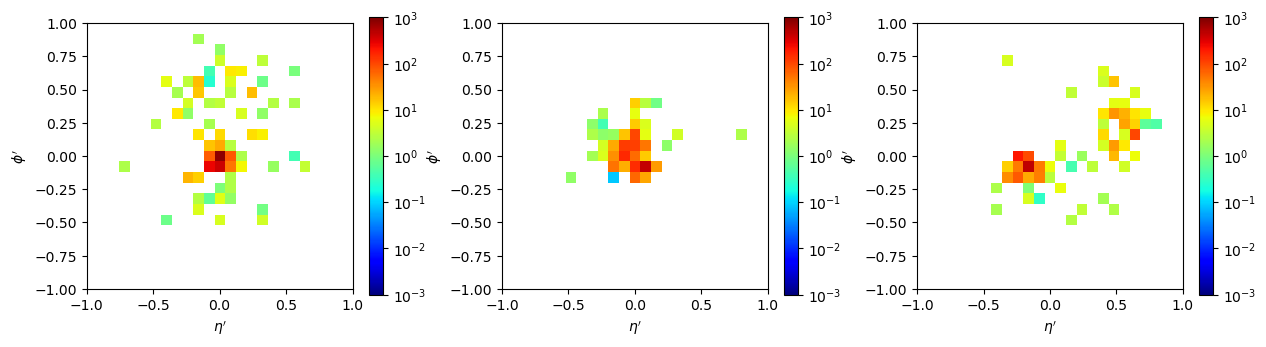

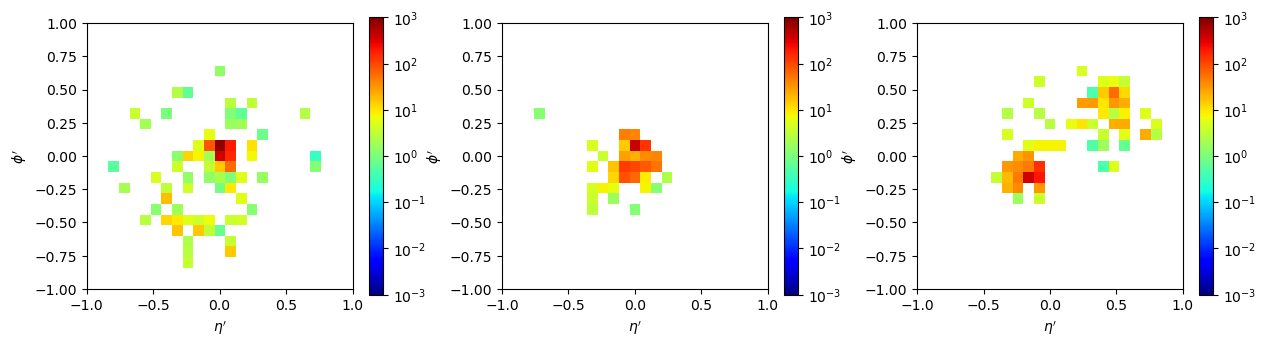

In [4]:
# Get original and augmented jet image from npy file
data = np.load('./HVmodel/data/eta_phi_pt_smearing_jet_rotation/25x25/01/sig_in_SR-data.npy')

original_size = data.shape[0]
events = np.array([0, 22, 1025])
n = len(events)


fig, ax = plt.subplots(1, n, figsize=(5*n, 4))
for i in range(n):
    event = events[i]
    plot_jet_image_on_axis(data[event,:,:,0].transpose(), ax[i])
    
# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
# plt.savefig('../figures/HVmodel_jet_image_eta_phi_pt_jet_aug_original.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()


data = np.load('./HVmodel/data/eta_phi_pt_smearing_jet_rotation/25x25/02/sig_in_SR-data.npy')

fig, ax = plt.subplots(1, n, figsize=(5*n, 4))

for i in range(n):
    event = events[i]
    plot_jet_image_on_axis(data[event,:,:,0].transpose(), ax[i])

# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
# plt.savefig('../figures/HVmodel_jet_image_eta_phi_pt_jet_aug_augmented.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

# From h5

## $\eta-\phi$ augmentation

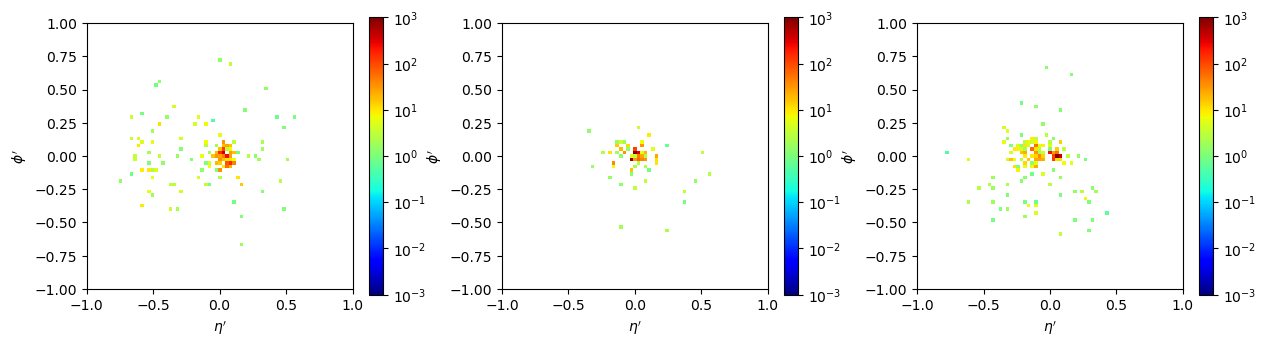

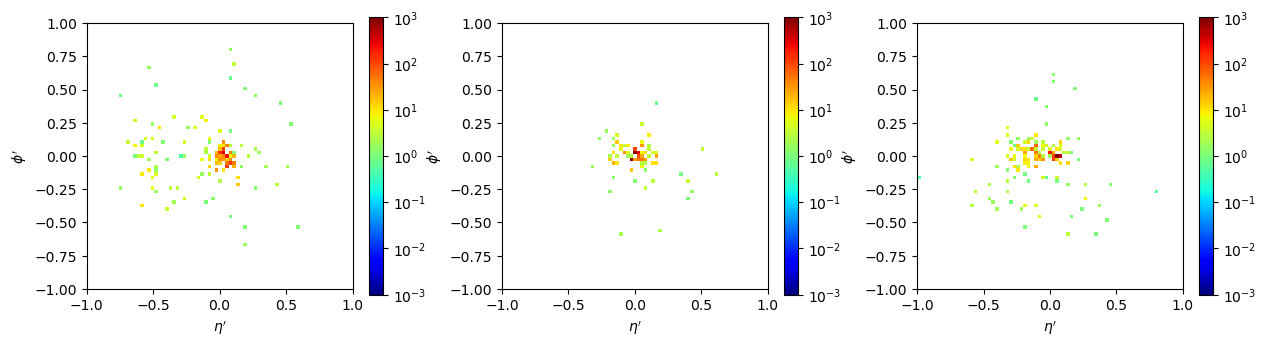

In [10]:
h5_path = './HVmodel/data/new/mix_sample_1.0_aug_1.h5'

with h5py.File(h5_path, 'r') as f:
    original_size = f['J1/pt'].shape[0] // 2
    events = np.array([0, 23, 120])
    n = len(events)

    events = np.concatenate((events, events + original_size))
    pt1 = f['J1/pt'][events]
    eta1 = f['J1/eta'][events]
    phi1 = f['J1/phi'][events]

pt1, eta1, phi1 = preprocess(pt1, eta1, phi1)


fig, ax = plt.subplots(1,n, figsize=(5*n, 4))

cmap = mpl.cm.get_cmap("jet").copy()
cmap.set_under(color='white')

for i in range(n):
    hist, _, _ = np.histogram2d(eta1[i], phi1[i], bins=[75, 75], range=[[-1.0, 1.0], [-1.0, 1.0]], weights=pt1[i])
    imag = ax[i].imshow(hist.transpose(), extent=[-1.0, 1.0, -1.0, 1.0], norm=colors.SymLogNorm(linthresh=0.0001, linscale=0.1, vmin=1e-3, vmax=1e3), cmap=cmap, origin='lower')
    ax[i].set_xlabel(r'$\eta^\prime$')
    ax[i].set_ylabel(r'$\phi^\prime$')
    cbar = plt.colorbar(imag, ax=ax[i], shrink=0.9)
# cbar.set_label(r'$ p_{\mathrm{T}}$ [GeV]', rotation=90, labelpad=5)
    
# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
plt.savefig('../figures/HVmodel_jet_image_one_event_original.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1,n, figsize=(5*n, 4))

cmap = mpl.cm.get_cmap("jet").copy()
cmap.set_under(color='white')

for i in range(n):
    hist, _, _ = np.histogram2d(eta1[n+i], phi1[n+i], bins=[75, 75], range=[[-1.0, 1.0], [-1.0, 1.0]], weights=pt1[n+i])
    imag = ax[i].imshow(hist.transpose(), extent=[-1.0, 1.0, -1.0, 1.0], norm=colors.SymLogNorm(linthresh=0.0001, linscale=0.1, vmin=1e-3, vmax=1e3), cmap=cmap, origin='lower')
    ax[i].set_xlabel(r'$\eta^\prime$')
    ax[i].set_ylabel(r'$\phi^\prime$')
    cbar = plt.colorbar(imag, ax=ax[i], shrink=0.9)
# cbar.set_label(r'$ p_{\mathrm{T}}$ [GeV]', rotation=90, labelpad=5)

# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
plt.savefig('../figures/HVmodel_jet_image_one_event_eta_phi_smearing.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## Change smearing scale 

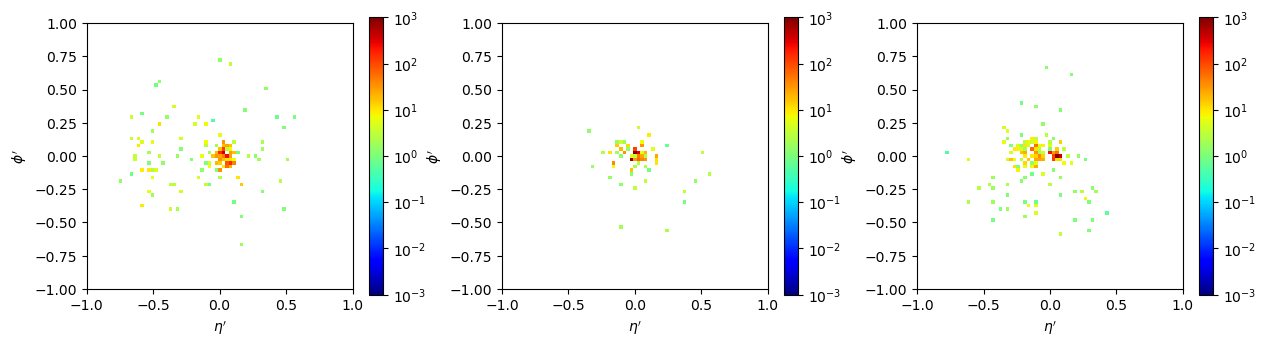

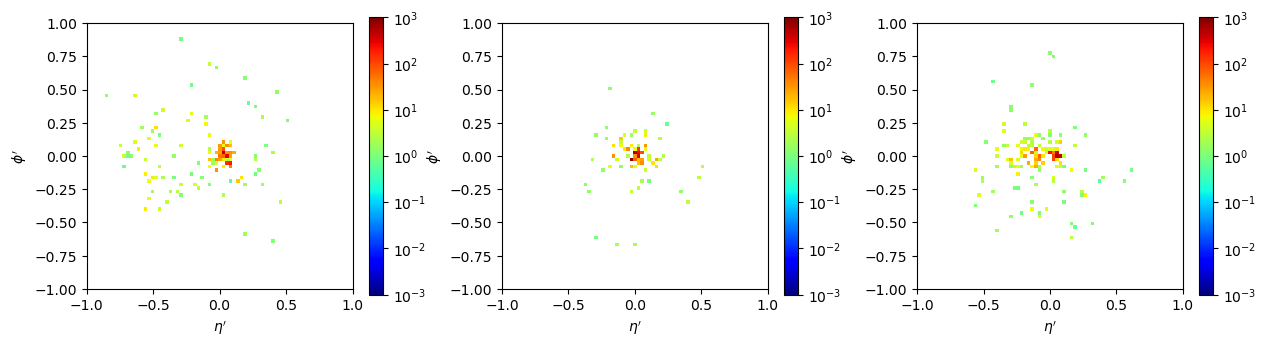

In [5]:
h5_path = './HVmodel/data/smearing_scale_02/mix_sample_1.0_aug_1.h5'

with h5py.File(h5_path, 'r') as f:
    original_size = f['J1/pt'].shape[0] // 2
    events = np.array([0, 23, 120])
    n = len(events)

    events = np.concatenate((events, events + original_size))
    pt1 = f['J1/pt'][events]
    eta1 = f['J1/eta'][events]
    phi1 = f['J1/phi'][events]

pt1, eta1, phi1 = preprocess(pt1, eta1, phi1)


fig, ax = plt.subplots(1,n, figsize=(5*n, 4))

cmap = mpl.cm.get_cmap("jet").copy()
cmap.set_under(color='white')

for i in range(n):
    hist, _, _ = np.histogram2d(eta1[i], phi1[i], bins=[75, 75], range=[[-1.0, 1.0], [-1.0, 1.0]], weights=pt1[i])
    imag = ax[i].imshow(hist.transpose(), extent=[-1.0, 1.0, -1.0, 1.0], norm=colors.SymLogNorm(linthresh=0.0001, linscale=0.1, vmin=1e-3, vmax=1e3), cmap=cmap, origin='lower')
    ax[i].set_xlabel(r'$\eta^\prime$')
    ax[i].set_ylabel(r'$\phi^\prime$')
    cbar = plt.colorbar(imag, ax=ax[i], shrink=0.9)
# cbar.set_label(r'$ p_{\mathrm{T}}$ [GeV]', rotation=90, labelpad=5)
    
# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
# plt.savefig('../figures/HVmodel_jet_image_one_event_original.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1,n, figsize=(5*n, 4))

cmap = mpl.cm.get_cmap("jet").copy()
cmap.set_under(color='white')

for i in range(n):
    hist, _, _ = np.histogram2d(eta1[n+i], phi1[n+i], bins=[75, 75], range=[[-1.0, 1.0], [-1.0, 1.0]], weights=pt1[n+i])
    imag = ax[i].imshow(hist.transpose(), extent=[-1.0, 1.0, -1.0, 1.0], norm=colors.SymLogNorm(linthresh=0.0001, linscale=0.1, vmin=1e-3, vmax=1e3), cmap=cmap, origin='lower')
    ax[i].set_xlabel(r'$\eta^\prime$')
    ax[i].set_ylabel(r'$\phi^\prime$')
    cbar = plt.colorbar(imag, ax=ax[i], shrink=0.9)
# cbar.set_label(r'$ p_{\mathrm{T}}$ [GeV]', rotation=90, labelpad=5)

# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
plt.savefig('../figures/HVmodel_jet_image_one_event_eta_phi_smearing_std_02.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

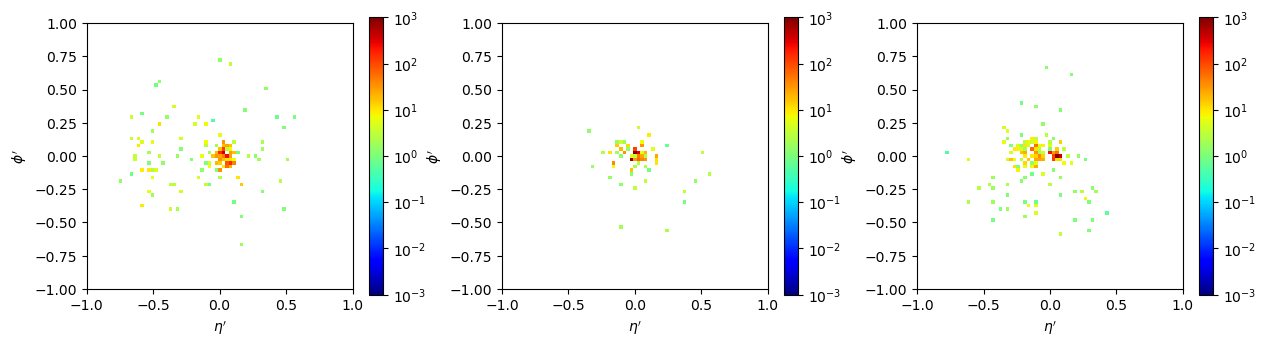

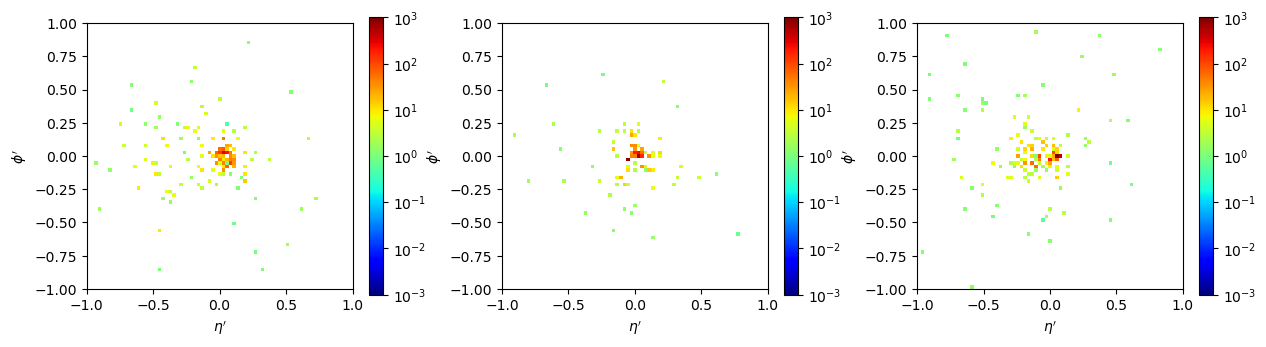

In [6]:
h5_path = './HVmodel/data/smearing_scale_05/mix_sample_1.0_aug_1.h5'


with h5py.File(h5_path, 'r') as f:
    original_size = f['J1/pt'].shape[0] // 2
    events = np.array([0, 23, 120])
    n = len(events)

    events = np.concatenate((events, events + original_size))
    pt1 = f['J1/pt'][events]
    eta1 = f['J1/eta'][events]
    phi1 = f['J1/phi'][events]

pt1, eta1, phi1 = preprocess(pt1, eta1, phi1)


fig, ax = plt.subplots(1, n, figsize=(5*n, 4))

cmap = mpl.cm.get_cmap("jet").copy()
cmap.set_under(color='white')

for i in range(n):
    hist, _, _ = np.histogram2d(eta1[i], phi1[i], bins=[75, 75], range=[[-1.0, 1.0], [-1.0, 1.0]], weights=pt1[i])
    imag = ax[i].imshow(hist.transpose(), extent=[-1.0, 1.0, -1.0, 1.0], norm=colors.SymLogNorm(linthresh=0.0001, linscale=0.1, vmin=1e-3, vmax=1e3), cmap=cmap, origin='lower')
    ax[i].set_xlabel(r'$\eta^\prime$')
    ax[i].set_ylabel(r'$\phi^\prime$')
    cbar = plt.colorbar(imag, ax=ax[i], shrink=0.9)
    
# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
# plt.savefig('../figures/HVmodel_jet_image_one_event_original.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1,n, figsize=(5*n, 4))

cmap = mpl.cm.get_cmap("jet").copy()
cmap.set_under(color='white')

for i in range(n):
    hist, _, _ = np.histogram2d(eta1[n+i], phi1[n+i], bins=[75, 75], range=[[-1.0, 1.0], [-1.0, 1.0]], weights=pt1[n+i])
    imag = ax[i].imshow(hist.transpose(), extent=[-1.0, 1.0, -1.0, 1.0], norm=colors.SymLogNorm(linthresh=0.0001, linscale=0.1, vmin=1e-3, vmax=1e3), cmap=cmap, origin='lower')
    ax[i].set_xlabel(r'$\eta^\prime$')
    ax[i].set_ylabel(r'$\phi^\prime$')
    cbar = plt.colorbar(imag, ax=ax[i], shrink=0.9)

# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
plt.savefig('../figures/HVmodel_jet_image_one_event_eta_phi_smearing_std_05.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## $p_\text{T}$ smearing

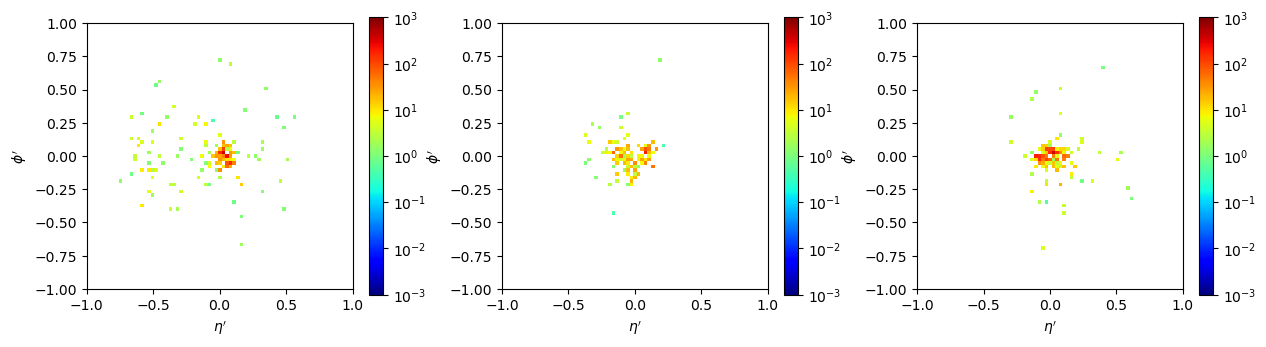

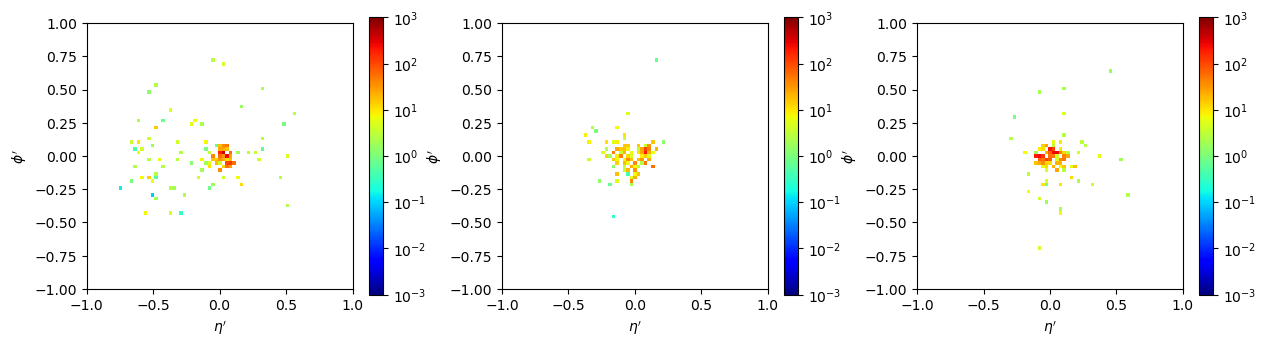

In [4]:
h5_path = './HVmodel/data/pt_smearing/mix_sample_1.0_pt_aug_1.h5'

# Get original and augmented pt, eta, phi from h5 file
with h5py.File(h5_path, 'r') as f:
    original_size = f['J1/pt'].shape[0] // 2
    events = np.array([0, 22, 96])
    n = len(events)

    events = np.concatenate((events, events + original_size))
    pt1 = f['J1/pt'][events]
    eta1 = f['J1/eta'][events]
    phi1 = f['J1/phi'][events]

pt1, eta1, phi1 = preprocess(pt1, eta1, phi1)


fig, ax = plt.subplots(1,n, figsize=(5*n, 4))

cmap = mpl.cm.get_cmap("jet").copy()
cmap.set_under(color='white')

for i in range(n):
    hist, _, _ = np.histogram2d(eta1[i], phi1[i], bins=[75, 75], range=[[-1.0, 1.0], [-1.0, 1.0]], weights=pt1[i])
    imag = ax[i].imshow(hist.transpose(), extent=[-1.0, 1.0, -1.0, 1.0], norm=colors.SymLogNorm(linthresh=0.0001, linscale=0.1, vmin=1e-3, vmax=1e3), cmap=cmap, origin='lower')
    ax[i].set_xlabel('$\eta^\prime$')
    ax[i].set_ylabel('$\phi^\prime$')
    cbar = plt.colorbar(imag, ax=ax[i], shrink=0.9)
    
# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
# plt.savefig('../figures/HVmodel_jet_image_origin.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1,n, figsize=(5*n, 4))

cmap = mpl.cm.get_cmap("jet").copy()
cmap.set_under(color='white')

for i in range(n):
    hist, _, _ = np.histogram2d(eta1[n+i], phi1[n+i], bins=[75, 75], range=[[-1.0, 1.0], [-1.0, 1.0]], weights=pt1[n+i])
    imag = ax[i].imshow(hist.transpose(), extent=[-1.0, 1.0, -1.0, 1.0], norm=colors.SymLogNorm(linthresh=0.0001, linscale=0.1, vmin=1e-3, vmax=1e3), cmap=cmap, origin='lower')
    ax[i].set_xlabel('$\eta^\prime$')
    ax[i].set_ylabel('$\phi^\prime$')
    cbar = plt.colorbar(imag, ax=ax[i], shrink=0.9)

# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
# plt.savefig('../figures/HVmodel_jet_image_pt_smearing.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

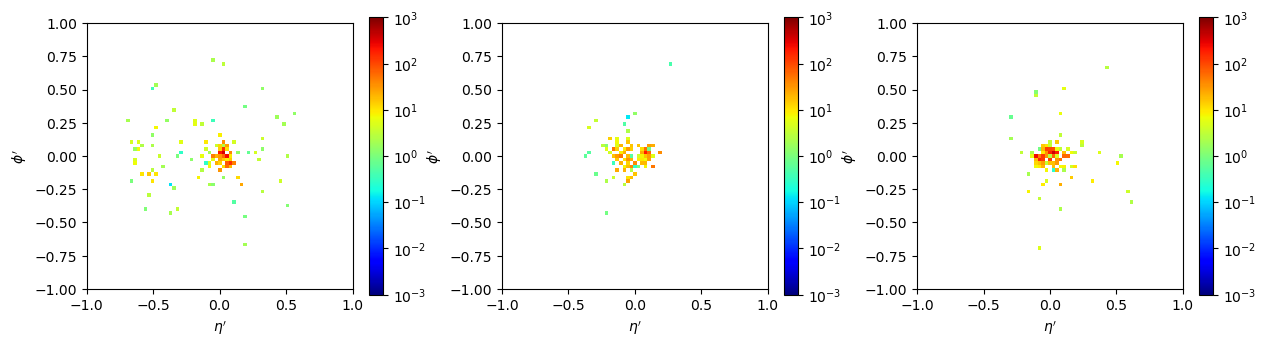

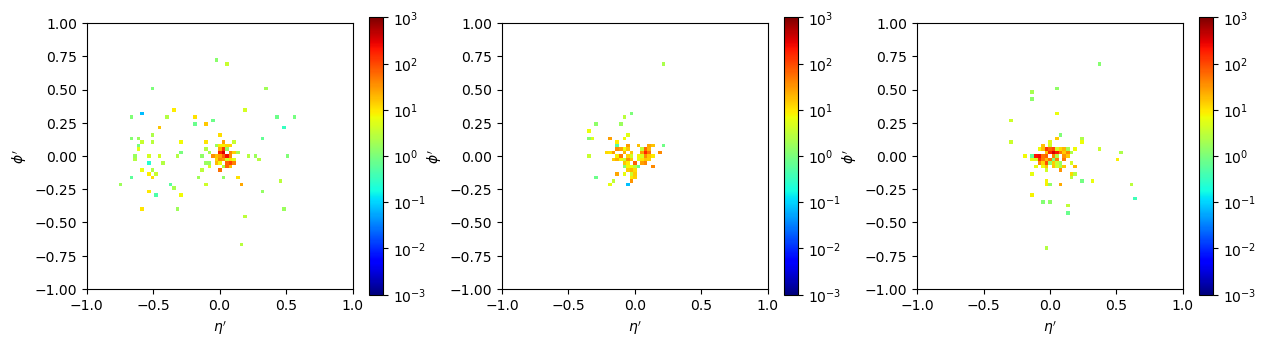

In [12]:
h5_path = './HVmodel/data/pt_smearing/01/sig_in_SR.h5'

# Get original and augmented pt, eta, phi from h5 file
with h5py.File(h5_path, 'r') as f:
    original_size = f['J1/pt'].shape[0] // 2
    events = np.array([0, 22, 96])
    n = len(events)

    events = np.concatenate((events, events + original_size))
    pt1 = f['J1/pt'][events]
    eta1 = f['J1/eta'][events]
    phi1 = f['J1/phi'][events]

# pt1, eta1, phi1 = preprocess(pt1, eta1, phi1)


fig, ax = plt.subplots(1,n, figsize=(5*n, 4))

cmap = mpl.cm.get_cmap("jet").copy()
cmap.set_under(color='white')

for i in range(n):
    hist, _, _ = np.histogram2d(eta1[i], phi1[i], bins=[75, 75], range=[[-1.0, 1.0], [-1.0, 1.0]], weights=pt1[i])
    imag = ax[i].imshow(hist.transpose(), extent=[-1.0, 1.0, -1.0, 1.0], norm=colors.SymLogNorm(linthresh=0.0001, linscale=0.1, vmin=1e-3, vmax=1e3), cmap=cmap, origin='lower')
    ax[i].set_xlabel('$\eta^\prime$')
    ax[i].set_ylabel('$\phi^\prime$')
    cbar = plt.colorbar(imag, ax=ax[i], shrink=0.9)
    
# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
# plt.savefig('../figures/HVmodel_jet_image_origin.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

h5_path = './HVmodel/data/pt_smearing/02/sig_in_SR.h5'

# Get original and augmented pt, eta, phi from h5 file
with h5py.File(h5_path, 'r') as f:
    original_size = f['J1/pt'].shape[0] // 2
    events = np.array([0, 22, 96])
    n = len(events)

    events = np.concatenate((events, events + original_size))
    pt1 = f['J1/pt'][events]
    eta1 = f['J1/eta'][events]
    phi1 = f['J1/phi'][events]


fig, ax = plt.subplots(1,n, figsize=(5*n, 4))
for i in range(n):
    hist, _, _ = np.histogram2d(eta1[i], phi1[i], bins=[75, 75], range=[[-1.0, 1.0], [-1.0, 1.0]], weights=pt1[i])
    imag = ax[i].imshow(hist.transpose(), extent=[-1.0, 1.0, -1.0, 1.0], norm=colors.SymLogNorm(linthresh=0.0001, linscale=0.1, vmin=1e-3, vmax=1e3), cmap=cmap, origin='lower')
    ax[i].set_xlabel('$\eta^\prime$')
    ax[i].set_ylabel('$\phi^\prime$')
    cbar = plt.colorbar(imag, ax=ax[i], shrink=0.9)

# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
# plt.savefig('../figures/HVmodel_jet_image_pt_smearing.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()